 
 # 'Disaster Tweets - Real or Fake?' - Project

In [2]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Importing Necessary libraries


In [3]:
# Most basic Stuff for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import plotly.graph_objects as go
 


# Core packages for Text Processing
import string
import re

# Libraries for Text Processing

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist 


# Loading some sklearn packages for modelling

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Loading packages for word clouds and NER
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
import en_core_web_sm

# Core packages for general use throughout the notebook

import random
import warnings
import time
import datetime


# for customizing plots 
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Loading Tensorflow packages

import tensorflow as tf
from tensorflow import keras
keras.__version__

# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

  # from from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# # Optional settings for General use

# stop = set(stopwords.words('english'))
# plt.style.use('fivethirtyeight')
# sns.set(font_scale = 1.5)
# pd.options.display.max_columns = 250
# pd.options.display.max_rows = 250
# warnings.filterwarnings('ignore')


# # Setting seeds for consistent results

# seed_val = 42
# random.seed(seed_val)
# np.random.seed(seed_val)



[nltk_data] Downloading package stopwords to C:\Users\bhaskar
[nltk_data]     kurasala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'2.4.0'

In [4]:
# Loading the Train and Test data for Visualization & exploration

train = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Disaster Tweets - Real or Fake\nlp-getting-started\train.csv')
test = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Disaster Tweets - Real or Fake\nlp-getting-started\test.csv')
submission = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Disaster Tweets - Real or Fake\nlp-getting-started\sample_submission.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train.describe()  # wont be much useful for this kind of problems

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
# Top 20 Locations

train.location.value_counts().head(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
New York, NY        15
Everywhere          15
California, USA     15
United Kingdom      14
Name: location, dtype: int64

In [10]:
# Top 20 Keywords

train.keyword.value_counts().head(20)

fatalities     45
armageddon     42
deluge         42
harm           41
body%20bags    41
damage         41
sinking        41
evacuate       40
twister        40
windstorm      40
collided       40
siren          40
fear           40
outbreak       40
derailment     39
weapon         39
hellfire       39
weapons        39
wreckage       39
earthquake     39
Name: keyword, dtype: int64

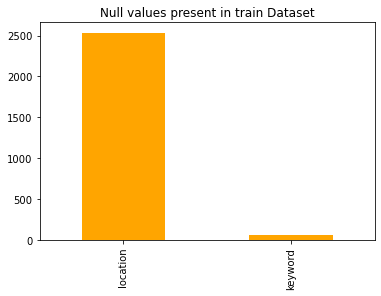

In [11]:
missing = train.isnull().sum()  
missing[missing>0].sort_values(ascending=False).plot(kind='bar',title='Null values present in train Dataset', color=['orange'])

In [12]:
train['length'] = train['text'].apply(len)

In [13]:
train.keyword.nunique()  # Total of 221 unique keywords

221

In [14]:
train.location.nunique() # Total of 221 unique locations

3341

In [15]:
## WordCount
STOPWORDS.add('https') # remove https to the world Cloud


def Plot_world(text):

    comment_words = ' '
    stopwords = set(STOPWORDS)
    for val in text:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            comment_words = comment_words + words + ' '

    worldclould = WordCloud(width= 5000, height= 4000,
    background_color='black', stopwords= stopwords, min_font_size= 10).generate(comment_words)

    # Plot WordCloud Image
    plt.figure(figsize=(12, 12), facecolor= 'k', edgecolor= 'k')
    plt.imshow(worldclould)
    plt.axis('off')
    plt.tight_layout(pad = 0)

    plt.show()

        



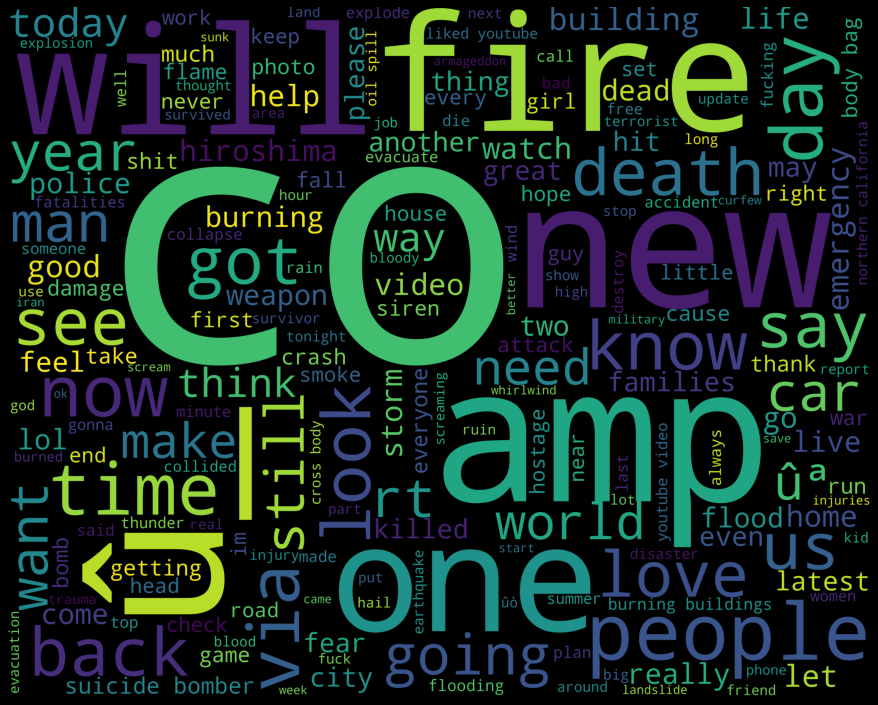

In [16]:
text = train.text.values

Plot_world(text)


In [17]:
train.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [18]:
train.text[0].split()

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [19]:
train.text[0].lower()

'our deeds are the reason of this #earthquake may allah forgive us all'


## Cleaning the Text

In [20]:
# how many http words has this text?

train.loc[train['text'].str.contains('http')]

,id,keyword,location,text,target,length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55
...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65


In [21]:
train.loc[train['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [22]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_html(text):
    no_html = pattern.sub('',text)
    return no_html



In [23]:
train.text.str.contains('http').value_counts()

True     3971
False    3642
Name: text, dtype: int64

In [24]:
train['text'][7612]


'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'

In [25]:
p = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
p

re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
re.UNICODE)

In [26]:
p1 = p.sub('',(train['text'][7612]))
p1

'The Latest: More Homes Razed by Northern California Wildfire - ABC News '

In [27]:
remove_html(train['text'][7612])

'The Latest: More Homes Razed by Northern California Wildfire - ABC News '

In [28]:
# Remove all text that start with html
train['text']=train['text'].apply(lambda x : remove_html(x))

In [29]:
# lets check if this clean works
train.loc[train['text'].str.contains('http')].target.value_counts()

0    1
Name: target, dtype: int64

In [30]:
train['text'][train['text'].str.contains('http')]#.value_counts()

121    Aftershock: Protect Yourself and Profit in the...
Name: text, dtype: object

In [31]:
# Remove all text that start with html in test
test['text']=test['text'].apply(lambda x : remove_html(x))


In [32]:
# Now remove stopwords, pass to lower add delimiter and more
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)

    text = text.lower()
    text = text.split()
    text = [w for w in text if w not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [33]:
text = train.text[12]
print(text)
clean_text(text)

#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count 


'raining flooding florida tampabay tampa days lost count'

In [34]:
# Apply clean text for training set
train['text'] = train['text'].apply(lambda x: clean_text(x))

In [35]:
# Apply clean text for Testing set
test['text'] = test['text'].apply(lambda x: clean_text(x))


In [36]:
# How many unique words have his text

def counter_word(text):
    count = Counter()
    values = 0
    for i, val in enumerate(text):
        # i +=1
        # print(i)
        # break
        for word in val.split():
            count[word] += 1
        #count[i] += 1
    return count
    
    print('There are {} unique values'.format(int(count)))

In [37]:
print(train.text[10])
# print(list(train.text[10]))
counter_word(train.text)
# print('There are {} unique values'.format(int(count)))

three people died heat wave far


5,
         'day': 120,
         'looooool': 1,
         'way': 81,
         'eat': 7,
         'shit': 56,
         'nyc': 12,
         'last': 83,
         'week': 40,
         'girlfriend': 6,
         'cooool': 1,
         'like': 348,
         'pasta': 2,
         'end': 44,
         'bbcmtd': 1,
         'wholesale': 4,
         'markets': 7,
         'ablaze': 29,
         'always': 46,
         'try': 19,
         'bring': 17,
         'metal': 13,
         'rt': 112,
         'africanbaze': 1,
         'news': 213,
         'nigeria': 5,
         'flag': 21,
         'set': 48,
         'aba': 14,
         'crying': 9,
         'plus': 8,
         'side': 24,
         'look': 73,
         'sky': 18,
         'night': 51,
         'phdsquares': 1,
         'mufc': 2,
         'built': 6,
         'much': 64,
         'hype': 3,
         'around': 40,
         'new': 228,
         'acquisitions': 2,
         'doubt': 5,
         'epl': 1,
         'season': 14,
         'inec': 

In [38]:
text_values = train["text"]

counter = counter_word(text_values)

print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 16070


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56)]

In [39]:
list(counter.items())[1] # for getting desired value
list(counter.items())[5:15]  # To get the value what yuo want for


[('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56),
 ('la', 24),
 ('ronge', 1),
 ('sask', 1),
 ('canada', 13),
 ('residents', 8)]

## Train Test split

In [40]:
# maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# max number of words in each complaint.
max_length = 20
trunc_type = 'post'
padding_type = 'post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

In [42]:
# This is base in 80% of the data, an only text and target at this moment

train_seq = train.text[0: training_size]
train_lbl = train.target[0: training_size]

val_seq = train.text[training_size : ]
val_lbl = train.target[training_size : ]

print('Shape of Traning set', train_seq.shape)
print('Shape of Validation set ', val_seq.shape)



Shape of Traning set (6090,)
Shape of Validation set  (1523,)


In [47]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_seq)

In [57]:
word_index = tokenizer.word_index
word_index
# let's see first 10 Elements
print('First word index are :')
for x in list(word_index)[0:10]:
    print('{}, {}'.format(x, word_index[x]))

First word index are :
<XXX>, 1
amp, 2
like, 3
fire, 4
get, 5
via, 6
new, 7
people, 8
news, 9
emergency, 10


In [58]:
train_seq = tokenizer.texts_to_sequences(train_seq)
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# print(train.text[1])
# print(train_seq[1])


AttributeError: 'int' object has no attribute 'lower'

## Check the Inverse

In [59]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


# Lets see the first 10 elements
print("THe first reverse word Index are: ")
for x in list(reverse_word_index)[0:15]:
    print (" {},  {} ".format(x,  reverse_word_index[x]))

# If you want to see completed -> reverse_word_index

THe first reverse word Index are: 
 1,  <XXX> 
 2,  amp 
 3,  like 
 4,  fire 
 5,  get 
 6,  via 
 7,  new 
 8,  people 
 9,  news 
 10,  emergency 
 11,  one 
 12,  disaster 
 13,  body 
 14,  video 
 15,  burning 


In [60]:
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [67]:
print(train.text[3])
print(train_seq[3])
decode(train_seq[3])

people receive wildfires evacuation orders california
[8, 3678, 1076, 116, 974, 26]


'people receive wildfires evacuation orders california'

In [74]:
# reverse_word_index.get(i, '?') for i in Text
trick = [124, 951, 145, 156]

decode(trick)

'military gunman plan wildfire'

In [75]:
train_pad[1628]

array([7779, 1150, 2107,  629, 2106, 1257,   52,  326, 2106, 1257,   52,
        326, 7780,    0,    0,    0,    0,    0,    0,    0])

In [76]:
val_seq = tokenizer.texts_to_sequences(val_seq)
val_pad = pad_sequences(val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Creating the Model

In [78]:
# model Definition withh LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length =max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(14, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')  # Its a binary classification
]
)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            514240    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 14)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 565,725
Trainable params: 565,725
Non-trainable params: 0
_________________________________________________________________


In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model,  to_file='model_plot4a.png', show_shapes= True, show_layer_names= True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [91]:
start_time = time.time()

epoches = 3 # first used 5 but from 3 is elbow from curve
history = model.fit(train_pad, train_lbl, epochs = epoches, validation_data=(val_pad, val_lbl))

final_time = (time.time() - start_time)
print('Time took for fitting the model ', final_time)

Epoch 1/3
191/191 [==============================] - 4s 20ms/step - loss: 0.0367 - accuracy: 0.9803 - val_loss: 1.5112 - val_accuracy: 0.7242
Epoch 2/3
191/191 [==============================] - 4s 19ms/step - loss: 0.0338 - accuracy: 0.9816 - val_loss: 1.3341 - val_accuracy: 0.7301
Epoch 3/3
191/191 [==============================] - 3s 18ms/step - loss: 0.0361 - accuracy: 0.9821 - val_loss: 1.4318 - val_accuracy: 0.7039
Time took for fitting the model  11.131772756576538


In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.036718,0.980296,1.511185,0.724229
1,0.033787,0.981609,1.334133,0.730138
2,0.036087,0.982102,1.431814,0.703874


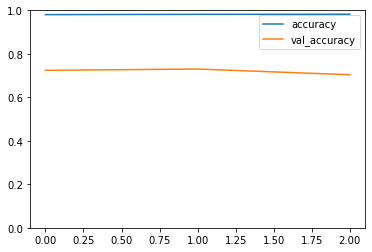

In [93]:
model_loss[['accuracy', 'val_accuracy']].plot(ylim = [0, 1]);

In [94]:
## model Evaluation

predictions = model.predict_classes(val_pad)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [95]:
predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

# Hoswing confusion matrix

def plot_cm(y_true, y_pred, title, figsize = (5, 4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis =1, keepdims=True)
    cm_prec = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_prec[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)


    cm = pd.DataFrame(cm, index = np.unique(y_true), columns = np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title)
    sns.heatmap(cm, cmap = 'YlGnBu', annot=annot, fmt = '', ax =ax)







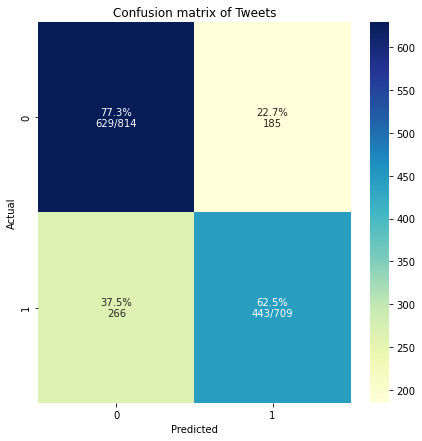

In [100]:
# showing Cofusion Matrix
plot_cm(val_lbl, predictions, 'Confusion matrix of Tweets', figsize=(7, 7))

## Working with the Test Dataset


In [101]:
test_seq = tokenizer.texts_to_sequences(test.text)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [102]:
preds = model.predict(test_pad)

In [103]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [104]:
submission['target'] = (preds > 0.5).astype(int)

In [105]:
submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [106]:
submission.to_csv('submission.csv', index=False,header=True)